## Step 1: **Import libraries and load data**

In [1]:
# Step 1: Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install lightgbm

# Load train, test, and store datasets
train = pd.read_csv("/home/gayathri/Documents/Rossmann-Sales/data/train.csv")
test = pd.read_csv("/home/gayathri/Documents/Rossmann-Sales/data/test.csv")
store = pd.read_csv("/home/gayathri/Documents/Rossmann-Sales/data/store.csv")

# Check dataset sizes
train.shape, test.shape, store.shape

/home/gayathri/Documents/Rossmann-Sales/rossmann-env/bin/pip: 2: exec: /home/gayathri/Documents/Rossman Project/rossmann-env/bin/python3: not found


/tmp/ipykernel_13415/131585079.py:8: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv("/home/gayathri/Documents/Rossmann-Sales/data/train.csv")


((1017209, 9), (41088, 8), (1115, 10))

## **Step 2: Peek at the data**

In [2]:
# View the first 5 rows of train dataset
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


## **Step 3: EDA (Exploratory Data Analysis)**

In [3]:
# Check info about data types and missing values
train.info()

# Count missing values
train.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [4]:
##Explore store dataset
##We merge store metadata into train/test. Before that, we need to check for missing values and data types.

# Store dataset overview
store.info()

# Missing values
store.isna().sum()

# First few rows
store.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN



 **Conclusion**:  
- Store metadata adds useful features (store type, assortment, competition, promotions).  
- Several columns have missing values: these will need handling.  
- Example strategies for later:  
  - Fill `CompetitionDistance` NaN with a large number (meaning “no nearby competition”).  
  - Fill missing promo-related fields with 0 or “no promo”.  

In [5]:
# Basic statistics of numeric columns
train.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


**Observation:**

- Sales range from 0 up to ~41,000 per day.  
- Many days have Sales = 0 (likely when stores are closed).  
- The mean (~5773) is higher than the median (~5588), showing a right-skewed distribution.  
- Customers column is strongly related to Sales, but note: it is not available in the test set.  
- Variables like `Open`, `Promo`, and `SchoolHoliday` are binary (0/1) features that will be useful for modeling.  
- Distribution is skewed → log-transform may help later.

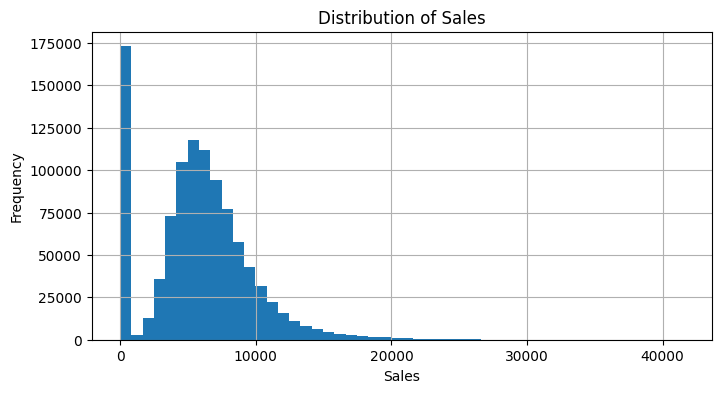

In [6]:
## Sales distribution
train["Sales"].hist(bins=50, figsize=(8,4))
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.title("Distribution of Sales")
plt.show()

**Conclusion:**

- Histogram confirms right-skew: most stores sell under 10k per day, but some outliers reach 40k+.  
- The long right tail pulls the mean further right compared to the median.  
- We will later apply a log-transform to stabilize variance for modeling.

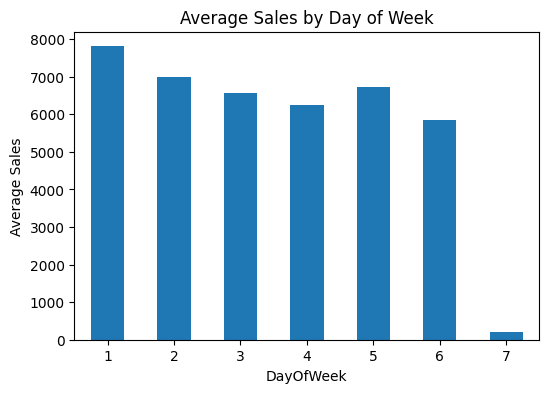

In [7]:
## Sales by day of the week
train.groupby("DayOfWeek")["Sales"].mean().plot(kind="bar", figsize=(6,4))
plt.ylabel("Average Sales")
plt.title("Average Sales by Day of Week")
plt.xticks(rotation=0) 
plt.show()

**Conclusion**:
- Mondays (DayOfWeek = 1) show the highest average sales.  
- Sales are fairly stable from Tuesday to Friday.  
- Saturdays (DayOfWeek = 6) are strong but slightly below Monday.  
- Sundays (DayOfWeek = 7) are mostly closed → sales near zero.  
- DayOfWeek is a strong predictor to include in the model.  

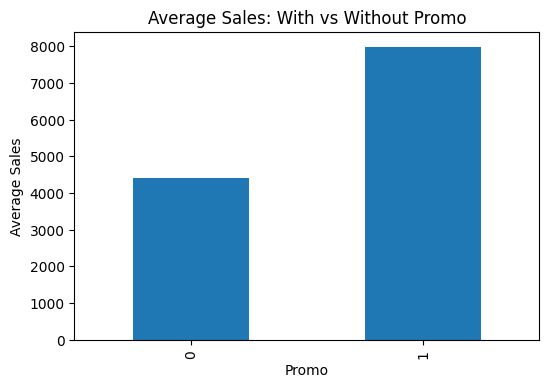

In [8]:
## Effect of promotions
train.groupby("Promo")["Sales"].mean().plot(kind="bar", figsize=(6,4))
plt.ylabel("Average Sales")
plt.title("Average Sales: With vs Without Promo")
plt.show()

**Observation**: 

Sales are significantly higher during promotions.  
→ Promo is a key driver of sales.

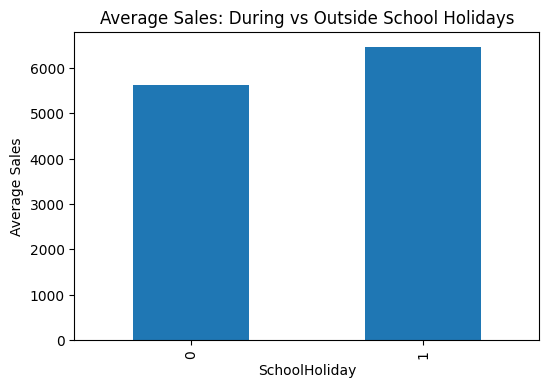

In [9]:
##School holidays
train.groupby("SchoolHoliday")["Sales"].mean().plot(kind="bar", figsize=(6,4))
plt.ylabel("Average Sales")
plt.title("Average Sales: During vs Outside School Holidays")
plt.show()

**Observation:**

Sales dip slightly during school holidays.

→ Another factor to include in modeling.

## **Step 4: Data Preparation & Feature Engineering**

In [10]:
##Merge store metadata
merged_train = train.merge(store, on="Store", how="left")
merged_test  = test.merge(store, on="Store", how="left")

merged_train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


**Observation:**

Now train has both daily features (date, promo, holidays) and store metadata (type, assortment, competition).

Some store-level columns still contain missing values (CompetitionDistance, Promo2 fields).

In [11]:
##missing values

print("Missing values in train before filling:\n", merged_train.isna().sum())
print("\nMissing values in test before filling:\n", merged_test.isna().sum())

Missing values in train before filling:
 Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
dtype: int64

Missing values in test before filling:
 Id                               0
Store                            0
DayOfWeek                        0
Date                             0
Open                            11
Promo                            0
StateHoliday                     0
SchoolHolida

## Handling Missing Values

We first check missing values and then decide how to fill them:

- `CompetitionDistance`: NaN means no competitor nearby → fill with a very large value (1,000,000).  
- `CompetitionOpenSinceMonth` & `CompetitionOpenSinceYear`: missing means no competition opening info → fill with 0.  
- `Promo2SinceWeek`, `Promo2SinceYear`, `PromoInterval`: missing means store not in Promo2 → fill with 0.  

In [12]:
# Fill missing CompetitionDistance with a large value (no competitor nearby)
merged_train["CompetitionDistance"].fillna(1e6, inplace=True)
merged_test["CompetitionDistance"].fillna(1e6, inplace=True)

# Fill missing competition opening dates with 0
for col in ["CompetitionOpenSinceMonth", "CompetitionOpenSinceYear"]:
    merged_train[col].fillna(0, inplace=True)
    merged_test[col].fillna(0, inplace=True)

# Fill missing Promo2 fields with 0
for col in ["Promo2SinceWeek", "Promo2SinceYear", "PromoInterval"]:
    merged_train[col].fillna(0, inplace=True)
    merged_test[col].fillna(0, inplace=True)
    

/tmp/ipykernel_13415/4155843787.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_train["CompetitionDistance"].fillna(1e6, inplace=True)
/tmp/ipykernel_13415/4155843787.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpla

In [13]:
print("After filling (train):\n", merged_train.isna().sum())
print("\nAfter filling (test):\n", merged_test.isna().sum())

After filling (train):
 Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

After filling (test):
 Id                            0
Store                         0
DayOfWeek                     0
Date                          0
Open                         11
Promo                         0
StateHoliday                  0
SchoolHoliday                 0
StoreType                     0
Assortment                    0
CompetitionDistance           0
CompetitionOpenSinceMonth    

In [14]:
##Date features
# Convert Date to datetime
merged_train["Date"] = pd.to_datetime(merged_train["Date"])
merged_test["Date"]  = pd.to_datetime(merged_test["Date"])

# Extract useful time-based features
for df in [merged_train, merged_test]:
    df["Year"] = df["Date"].dt.year
    df["Month"] = df["Date"].dt.month
    df["Day"] = df["Date"].dt.day
    df["WeekOfYear"] = df["Date"].dt.isocalendar().week

In [15]:
##Log-transform Sales

##This one is simple but important, because of the skewness we saw in EDA.


# Apply only to train (test has no Sales)
merged_train["Sales_log"] = np.log1p(merged_train["Sales"])

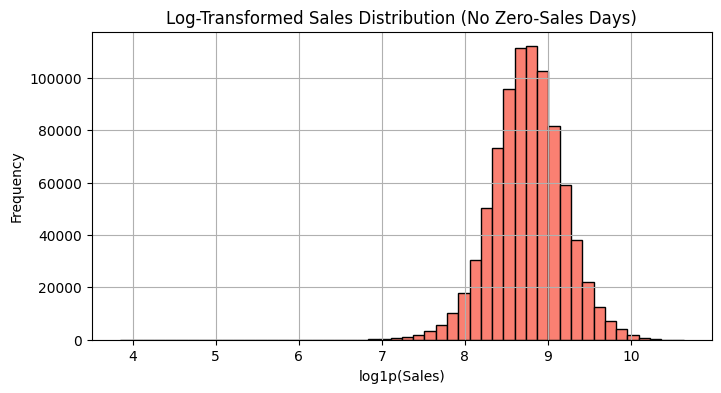

In [16]:
# Remove closed days (Sales = 0) before plotting
merged_train = merged_train[merged_train["Sales"] > 0]

# Plot log-transformed distribution again
merged_train["Sales_log"].hist(bins=50, figsize=(8,4), color="salmon", edgecolor="black")
plt.xlabel("log1p(Sales)")
plt.ylabel("Frequency")
plt.title("Log-Transformed Sales Distribution (No Zero-Sales Days)")
plt.show()

**Observation:**

- Sales were originally right-skewed.  
- Applying `log1p(Sales)` stabilizes variance and reduces the influence of outliers.  
- After transformation (and removing zero-sales days), the distribution is smoother and closer to normal, which helps the model learn better.  
- During prediction, we will convert results back to the original scale using `np.expm1()`.  

## **Step 5 — Baseline Model (LightGBM)**

In [17]:
##Pick features (same in train & test)

# Use only columns available in BOTH train and test
feature_cols = [
    # day-level
    "DayOfWeek","Open","Promo","StateHoliday","SchoolHoliday",
    "Year","Month","Day","WeekOfYear",
    # store-level
    "StoreType","Assortment","CompetitionDistance",
    "CompetitionOpenSinceMonth","CompetitionOpenSinceYear",
    "Promo2","Promo2SinceWeek","Promo2SinceYear","PromoInterval"
]

In [18]:
# Safety: keep only these columns (plus Date, Sales if present)
keep_cols_train = list(set(feature_cols + ["Date","Sales","Sales_log"]))
keep_cols_test  = list(set(feature_cols + ["Date"]))
tr = merged_train[keep_cols_train].copy()
te = merged_test[keep_cols_test].copy()

**Observation**

We exclude Customers (not in test).

Keep the set small and reliable for a baseline.

In [19]:
##Encode categoricals consistently

# String-ify categoricals so encoding is stable
cat_cols = ["StateHoliday","StoreType","Assortment","PromoInterval"]
for c in cat_cols:
    tr[c] = tr[c].astype(str)
    te[c] = te[c].astype(str)

In [20]:
# Fit category codes on the joint data so train/test share the same mapping
joint = pd.concat([tr[feature_cols], te[feature_cols]], axis=0, ignore_index=True)
for c in cat_cols:
    joint[c] = joint[c].astype("category")
    cats = joint[c].cat.categories
    tr[c] = pd.Categorical(tr[c], categories=cats).codes
    te[c] = pd.Categorical(te[c], categories=cats).codes

**Observation**

Categorical features (`StateHoliday`, `StoreType`, `Assortment`, `PromoInterval`) were label-encoded on combined train+test, ensuring consistent mappings (e.g. "a"→0, "b"→1, "c"→2 in both).

In [ ]:
# Ensure remaining are numeric
numeric_cols = [c for c in feature_cols if c not in cat_cols]
tr[numeric_cols] = tr[numeric_cols].apply(pd.to_numeric, errors="coerce")
te[numeric_cols] = te[numeric_cols].apply(pd.to_numeric, errors="coerce")

**Observation**  
All non-categorical features were forced to numeric (`int`/`float`) to ensure clean inputs for LightGBM and avoid hidden string values.